<a href="https://colab.research.google.com/github/Aromer9/mnist_deeplearning/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#pip install dense-basis

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation
#from keras.utils import np_utils
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

In [46]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


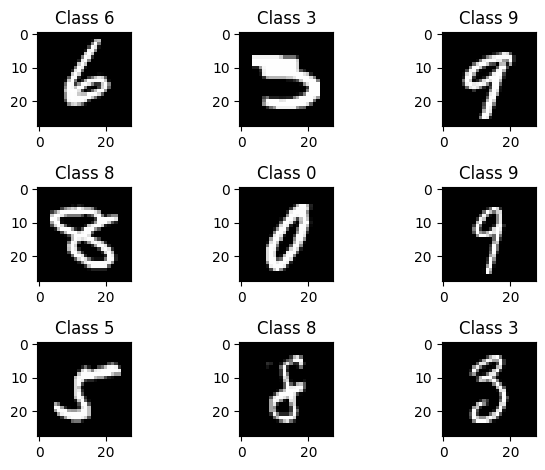

In [47]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [48]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [49]:
no_classes = 10

Y_train = to_categorical(y_train, no_classes)
Y_test = to_categorical(y_test, no_classes)

In [50]:
model = Sequential()

In [51]:
model.add(Dense(512, input_shape=(784,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.add(Activation('relu'))

In [53]:
model.add(Dropout(0.2))

In [54]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [55]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

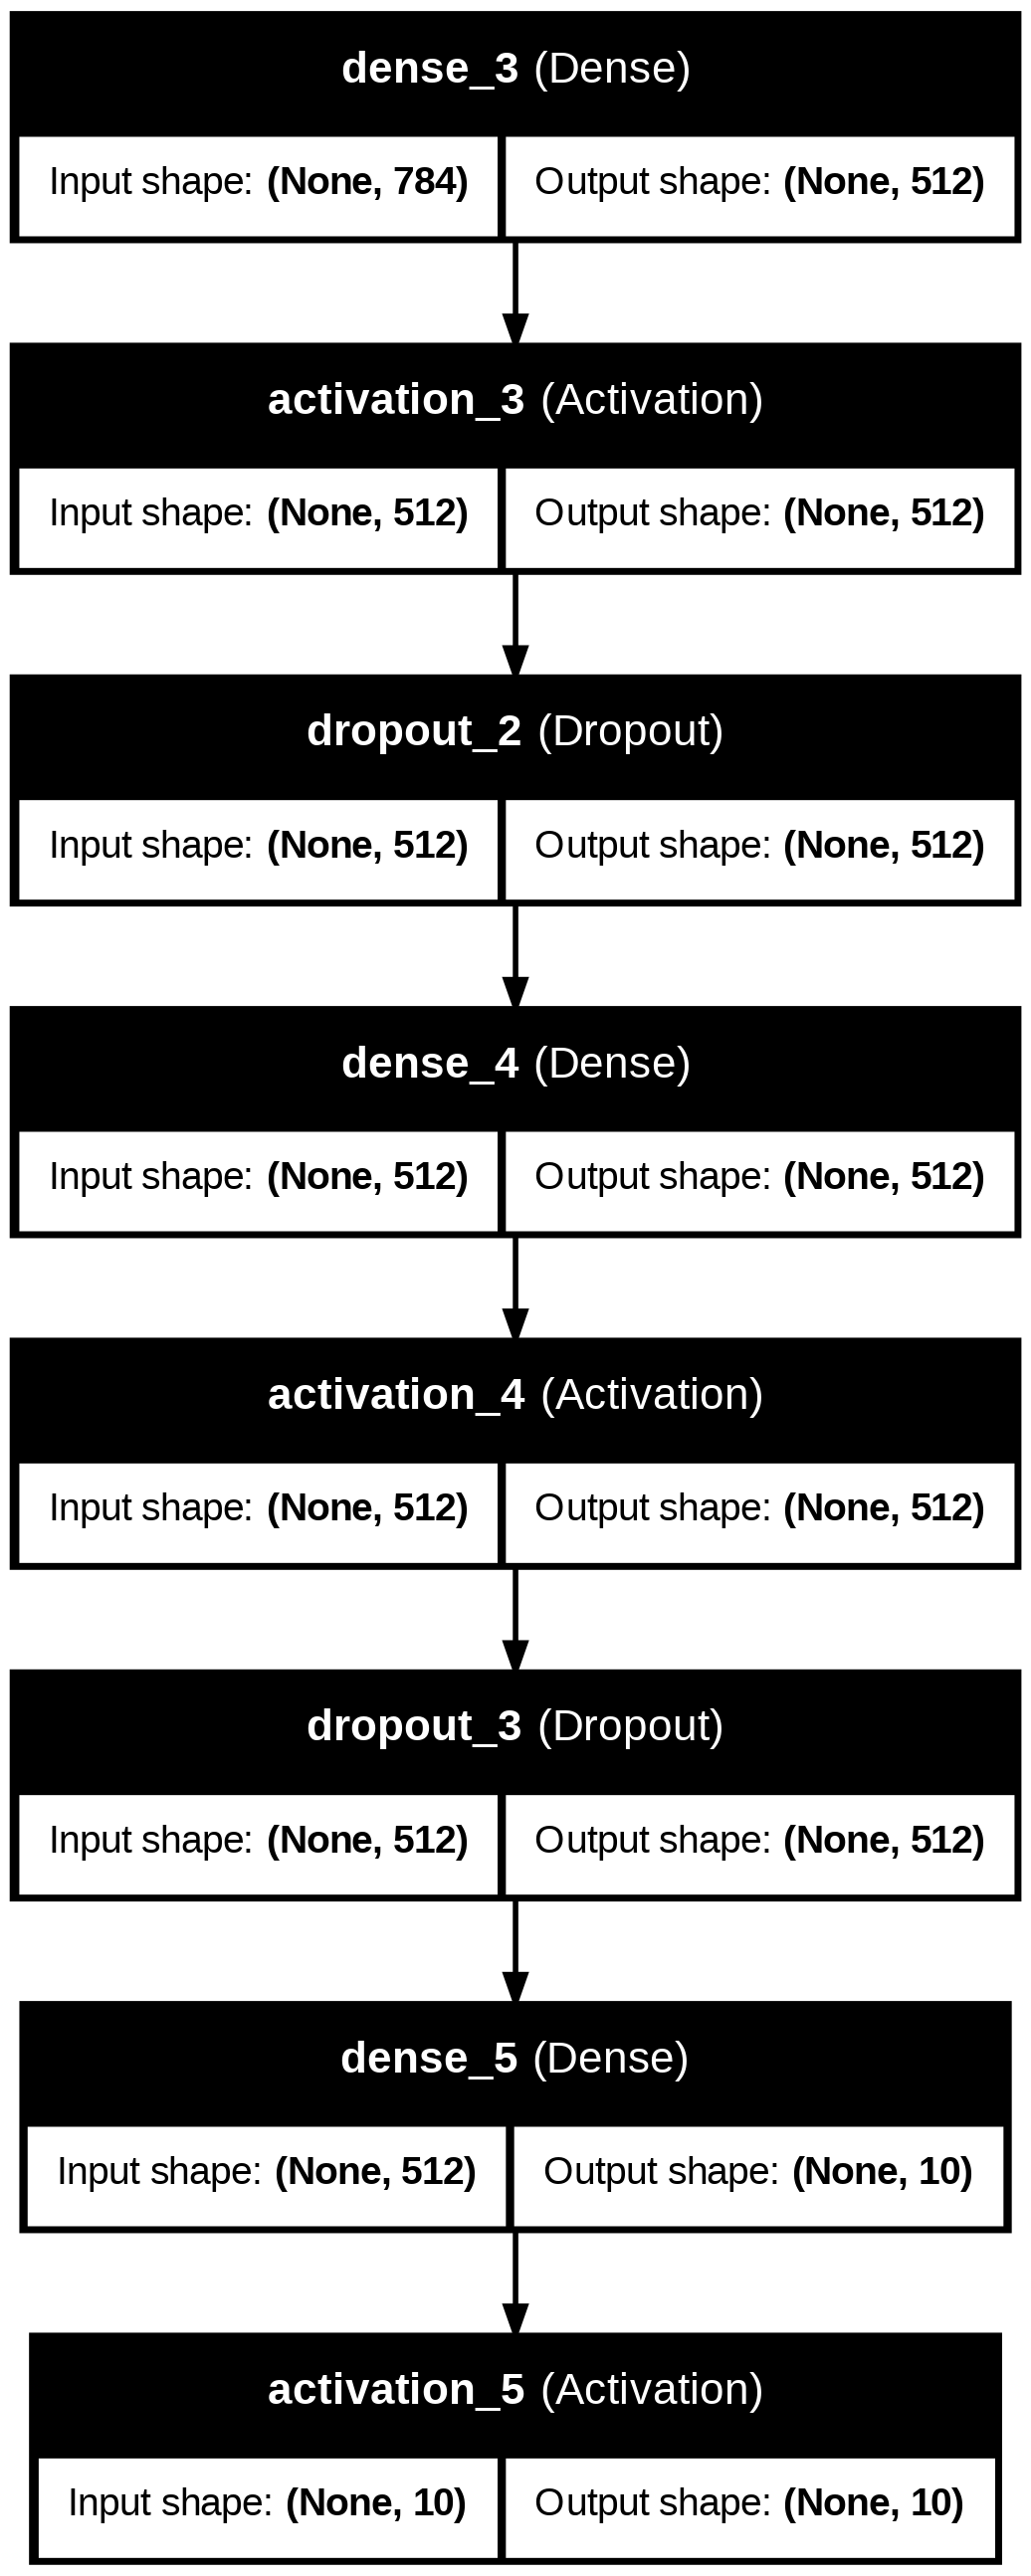

In [57]:
from keras.utils import plot_model
plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model_chart.png")

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.8639 - loss: 0.4537
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9677 - loss: 0.1062
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9769 - loss: 0.0732
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9828 - loss: 0.0529
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9872 - loss: 0.0408
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9881 - loss: 0.0374
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9892 - loss: 0.0328
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9910 - loss: 0.0272
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9909 - loss: 0.0265
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9919 - loss: 0.0243


In [60]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9756 - loss: 0.0956
Test accuracy: 0.9803000092506409


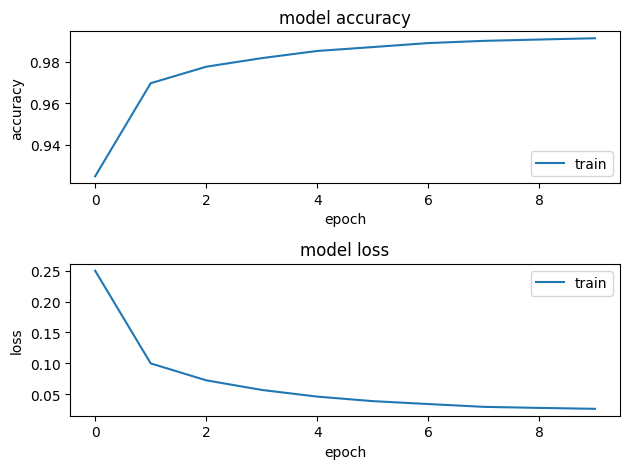

In [61]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [62]:
results = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [63]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

In [64]:
submission

,ImageId,Label
0,1,7.0
1,2,2.0
2,3,1.0
3,4,0.0
4,5,4.0
...,...,...
27995,27996,NaN
27996,27997,NaN
27997,27998,NaN
27998,27999,NaN


In [125]:
predicted_classes = model.predict(X_test)

correct_indices = np.nonzero(np.argmax(predicted_classes,axis = 1) == y_test)[0]

incorrect_indices = np.nonzero(np.argmax(predicted_classes,axis = 1) != y_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [126]:
y_test[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

In [127]:
np.argmax(predicted_classes[:9],axis = 1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [128]:
correct_indices[:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

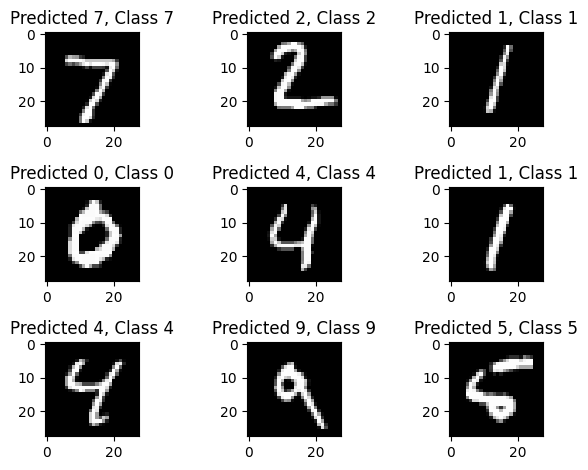

In [131]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(np.argmax(predicted_classes,axis = 1)[correct], y_test[correct]))

plt.tight_layout()

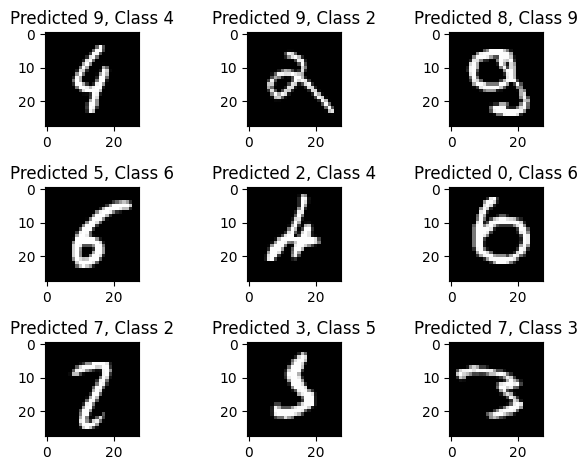

In [134]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(np.argmax(predicted_classes,axis = 1)[incorrect], y_test[incorrect]))

plt.tight_layout()

In [142]:
pip install Image

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 43.7 MB/s eta 0:00:00
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=54954f766f634725187c49185da1b8b66206488c83a44cf82be8ec015c6b319b
  Stored in directory: /root/.cache/pip/wheels/70/0c/a4/7cfa53a5c6225c2db2bfec08e782b43d0f25fdae2e995b69be
Successfully built Image


In [144]:
#import Image
#import pymongo
#import base64
from PIL import Image, ImageOps

img_predict = '1.jpg'
img_predict = Image.open(img_predict)

In [149]:
model.predict(img_predict)

ValueError: Unrecognized data type: x=<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x470 at 0x7AE1D2A51F60> (of type <class 'PIL.JpegImagePlugin.JpegImageFile'>)